In [1]:
from trajectree.sequence.swap import perform_swapping_simulation, create_swapping_simulation
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Set simulation params
def run_experiment(num_simulations = 1000, max_cache_nodes=1000):
    N = 4
    error_tolerance = 1e-10

    params = {
        "PA_det_eff": (0.04),
        "BSM_det_loss_1":  (0.045),
        "BSM_det_loss_2": (0.135),
        "BSM_dark_counts_1": 1e-5,
        "BSM_dark_counts_2": 3e-5,
        "alpha_list": np.array([np.pi/2]),
        "delta_list": np.array([np.pi/2]),
        "channel_loss": 1e-7,
        "chi": 0.056, # 0.06,
        "BSM_meas": {0:(2,3), 1:(6,7)},

        "if_analyze_entanglement": True,
        "calc_fidelity": False,
        "damping_error": True,
        "depolarizing_error": False,
        "max_cache_nodes": max_cache_nodes
    }

    num_modes = 8
    # Create vacuum state
    
    # idler_angles = np.linspace(0, np.pi, 1)
    # signal_angles = np.linspace(0, 4*np.pi, 30)

    num_simulations = num_simulations # 20

    cache_size = 7

    iter = 0
    max_iter = 30
    threshold = 1e-4
    visibilities_mpn = []

    for chi in [0.056]: # np.linspace(0.03, 0.3, 5):
        params["chi"] = chi
        visibilities = []

        params["alpha_list"] = np.array([np.pi/2])
        psi_same, t_eval_same = create_swapping_simulation(N, num_modes, params, cache_size = cache_size, error_tolerance = error_tolerance)

        params["alpha_list"] = np.array([3*np.pi/2])
        psi_diff, t_eval_diff = create_swapping_simulation(N, num_modes, params, cache_size = cache_size, error_tolerance = error_tolerance)

        probabilities_same = []
        probabilities_diff = []
        iter = 0
        while iter < max_iter:
            # np.random.seed(iter)
            fidelities, probabilities, times_same = perform_swapping_simulation(psi_same, t_eval_same, num_simulations, verbose = False)
            # print("probabilities:", probabilities)
            # print("fidelities:", fidelities)
            probabilities_same.extend(probabilities)
            prob_mean_same_phase = np.mean(probabilities_same)

            # print("next case")

            fidelities, probabilities, times_diff = perform_swapping_simulation(psi_diff, t_eval_diff, num_simulations, verbose = False)
            # print("probabilities:", probabilities)
            # print("fidelities:", fidelities)
            probabilities_diff.extend(probabilities)
            prob_mean_diff_phase = np.mean(probabilities_diff)
            
            visibility = (prob_mean_same_phase - prob_mean_diff_phase) / (prob_mean_same_phase + prob_mean_diff_phase)

            # if iter > 0 and np.abs(visibility - visibilities[-1]) < threshold:
            #     return visibilities+[visibility], t_eval_same, t_eval_diff

            visibilities.append(visibility)
            print("visibility:", visibility)
            iter += 1
        print("next mpn:", chi)
        visibilities_mpn.append(visibilities)

    return visibilities_mpn, t_eval_same, t_eval_diff

In [3]:
vis, t_eval, _ = run_experiment()

/home/asingal/home/Trajectree/trajectree/fock_optics/measurement.py:84: LinAlgWarning: Matrix is singular. The result might be inaccurate or the array might not have a square root.
  dense_op = sqrtm(create_threshold_POVM_OP_Dense(efficiency, outcome, N)).astype(np.complex128)


visibility: (0.024246827752693226+4.110894115726705e-21j)
visibility: (0.5559156346909196+3.1213086808718697e-21j)
visibility: (0.5871496250448891+2.2456529634199702e-21j)
visibility: (0.6630745081049852+1.70165648158375e-21j)
visibility: (0.658127154320991+1.6845567448398047e-21j)
visibility: (0.6820499963233676+8.956553047986015e-22j)
visibility: (0.7039342662991392+7.437999741358836e-23j)
visibility: (0.7245868178466399+2.8045553672156182e-22j)
visibility: (0.7422272722433777+1.7919895518329407e-22j)
visibility: (0.7475351176623876+1.0783535025327425e-22j)
visibility: (0.7691816244506554+4.978362263543296e-23j)
visibility: (0.7683309972229269+2.1271870770593176e-23j)
visibility: (0.7766521980407499-7.836439080331068e-24j)
visibility: (0.7648614238645111-3.363009493369016e-23j)
visibility: (0.7746166461311372-5.71992066027923e-23j)
visibility: (0.7657693532804403-7.333537507308906e-23j)
visibility: (0.777857764899863-1.3665860458948097e-22j)
visibility: (0.7923792104788846-1.51252860

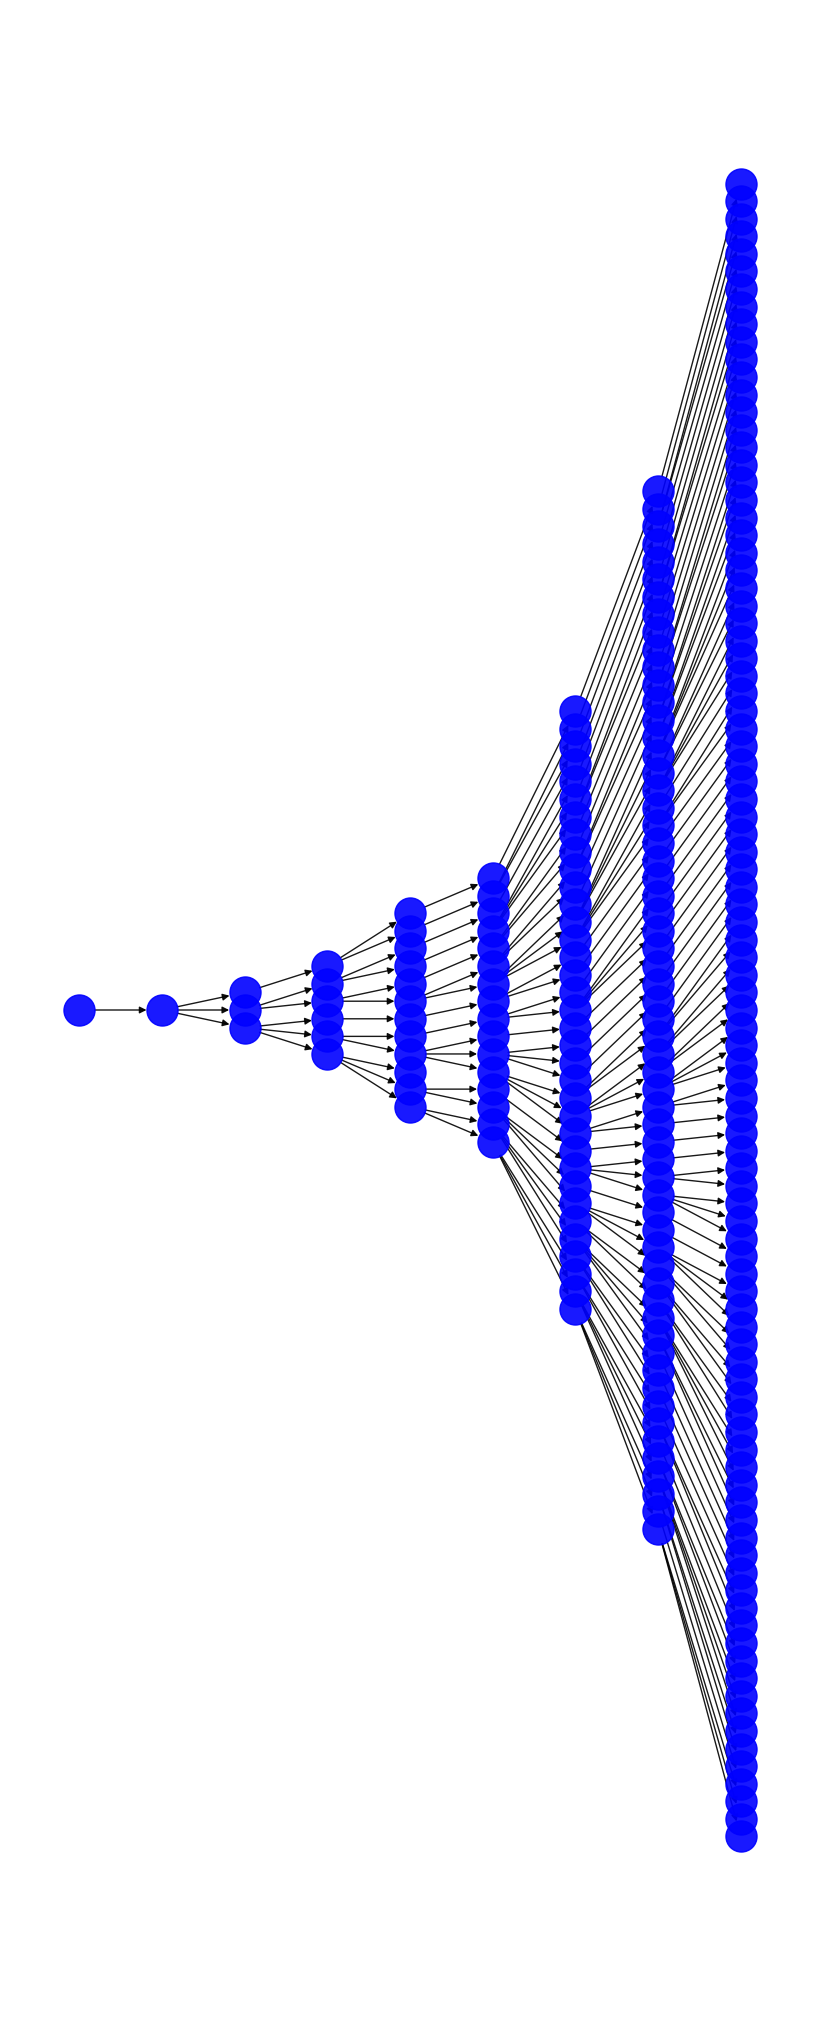

In [4]:
t_eval.show_graph()

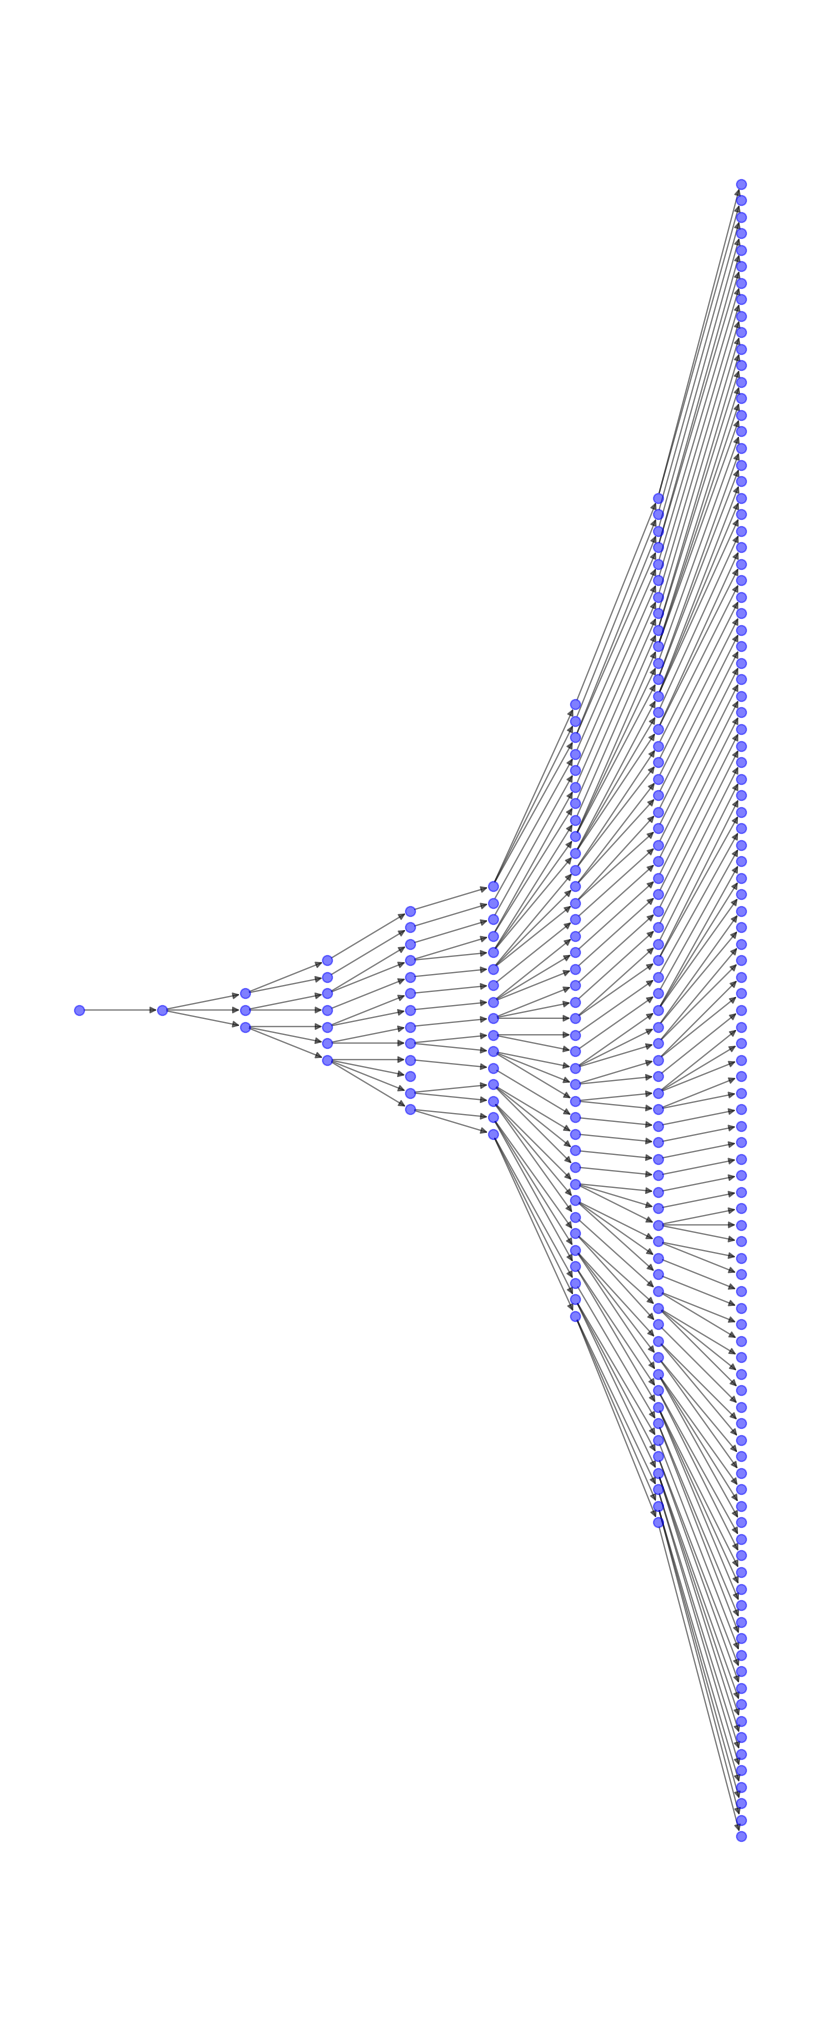

In [57]:
import networkx as nx
def show_graph(graph, node_descriptions = {}):
    """
        A typical node description would look like: node_descriptions = {(0,0,1): "Root Node", (0,0,1,2): "Child Node"}
    """
    pos = nx.bfs_layout(graph, (), align = "vertical", scale = 1) 

    plt.figure(figsize=(8, 20))
    nx.draw(graph, pos, with_labels=False, node_color='blue', node_size=50, alpha=0.5)
    # nx.draw_networkx_labels(graph, pos, labels=node_descriptions, font_size=12, font_color='black')
show_graph(t_eval.graph)

In [16]:
# seed = 10
for seed in [1]:
    np.random.seed(seed)
    vis = run_experiment(553, -1)
    np.random.seed(seed)
    vis = run_experiment(553, 100)

visibility: (0.1946060404606252-2.327872777390622e-24j)
visibility: (0.1946061391287626+0j)


In [ ]:
vis

([np.complex128(0.9819738998496405-8.964221199379716e-22j)],
 <trajectree.trajectory.trajectory_evaluator at 0x7598657646b0>)

In [ ]:
vis[1].cache_heap[1].accesses

1000

In [ ]:
vis[1].trajectree[3][(0,0,0)].trajectory_indices

array([7, 5, 4, 3, 2, 1, 0])

In [ ]:
from trajectree.sequence.swap import perform_swapping_simulation, create_swapping_simulation
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# Set simulation params
def run_experiment():
    N = 5
    error_tolerance = 1e-10

    params = {
        "PA_det_eff": (0.04),
        "BSM_det_loss_1":  (0.045),
        "BSM_det_loss_2": (0.135),
        "BSM_dark_counts_1": 1e-5,
        "BSM_dark_counts_2": 3e-5,
        "alpha_list": np.array([np.pi/2]),
        "delta_list": np.array([np.pi/2]),
        "channel_loss": 1e-7,
        "chi": 0.056, # 0.06,
        "BSM_meas": {0:(2,3), 1:(6,7)},

        "if_analyze_entanglement": True,
        "calc_fidelity": False,
        "damping_error": True,
        "depolarizing_error": False,
        "max_cache_nodes": -1
    }

    num_modes = 8
    # Create vacuum state
    
    # idler_angles = np.linspace(0, np.pi, 1)
    # signal_angles = np.linspace(0, 4*np.pi, 30)

    num_simulations = 1000 # 20
    visibilities = []

    cache_size = 7

    params["alpha_list"] = np.array([np.pi/2])
    psi_same, t_eval_same = create_swapping_simulation(N, num_modes, params, cache_size = cache_size, error_tolerance = error_tolerance)

    params["alpha_list"] = np.array([3*np.pi/2])
    psi_diff, t_eval_diff = create_swapping_simulation(N, num_modes, params, cache_size = cache_size, error_tolerance = error_tolerance)

    probabilities_same = []
    probabilities_diff = []

    iter = 0
    max_iter = 50
    threshold = 1e-4

    while iter < max_iter:
        # np.random.seed(iter)
        fidelities, probabilities, times_same = perform_swapping_simulation(psi_same, t_eval_same, num_simulations, verbose = True)
        # print("probabilities:", probabilities)
        # print("fidelities:", fidelities)
        probabilities_same.extend(probabilities)
        prob_mean_same_phase = np.mean(probabilities_same)

        print("next case")

        fidelities, probabilities, times_diff = perform_swapping_simulation(psi_diff, t_eval_diff, num_simulations, verbose = False)
        # print("probabilities:", probabilities)
        # print("fidelities:", fidelities)
        probabilities_diff.extend(probabilities)
        prob_mean_diff_phase = np.mean(probabilities_diff)
        
        visibility = (prob_mean_same_phase - prob_mean_diff_phase) / (prob_mean_same_phase + prob_mean_diff_phase)

        if iter > 0 and np.abs(visibility - visibilities[-1]) < threshold:
            return visibilities+[visibility]

        visibilities.append(visibility)
        print("visibility:", visibility)
        iter += 1

    return visibilities

In [ ]:
vis = run_experiment()

/home/asingal/home/Trajectree/trajectree/fock_optics/measurement.py:84: LinAlgWarning: Matrix is singular. The result might be inaccurate or the array might not have a square root.
  dense_op = sqrtm(create_threshold_POVM_OP_Dense(efficiency, outcome, N)).astype(np.complex128)


Completed 10% of simulations
Completed 20% of simulations
Completed 30% of simulations
Completed 40% of simulations
Completed 50% of simulations
Completed 60% of simulations
Completed 70% of simulations
Completed 80% of simulations
Completed 90% of simulations
next case
visibility: (0.9156834934713065+2.799037699334177e-20j)
Completed 10% of simulations
Completed 20% of simulations
Completed 30% of simulations
Completed 40% of simulations
Completed 50% of simulations
Completed 60% of simulations
Completed 70% of simulations
Completed 80% of simulations
Completed 90% of simulations
next case
visibility: (0.5128493674622874+2.044299317459466e-21j)
Completed 10% of simulations
Completed 20% of simulations
Completed 30% of simulations
Completed 40% of simulations
Completed 50% of simulations
Completed 60% of simulations
Completed 70% of simulations
Completed 80% of simulations
Completed 90% of simulations
next case
visibility: (0.5685421489458355+1.0592450068553806e-21j)
Completed 10% of s

In [ ]:
vis

[np.complex128(0.9156834934713065+2.799037699334177e-20j),
 np.complex128(0.5128493674622874+2.044299317459466e-21j),
 np.complex128(0.5685421489458355+1.0592450068553806e-21j),
 np.complex128(0.6390612774659179+2.072962395677888e-21j),
 np.complex128(0.6481389321265378+1.7606860722509983e-21j),
 np.complex128(0.6530959631154581+1.3787681563061232e-21j),
 np.complex128(0.6466721410368198+1.267222753541382e-21j),
 np.complex128(0.6197712744088281+1.3974716300152145e-21j),
 np.complex128(0.6529526854431416+1.6854061500181885e-21j),
 np.complex128(0.6890925009963027+1.8999288343497243e-21j)]

First, we compare the amount of time required to perform the two simulations with and without caches. 

In [ ]:
import time
# Set simulation params
N = 3
error_tolerance = 1e-7

params = {
    "PA_det_eff": 0.96,
    "BSM_det_loss_1":  0.045,
    "BSM_det_loss_2": 0.135,
    "BSM_dark_counts_1": 1,
    "BSM_dark_counts_2": 1,
    "alpha_list": np.array([np.pi/2]),
    "delta_list": np.array([np.pi/2]),
    "channel_loss": 1e-5,
    "chi": 0.24,
    "BSM_meas": {0:(2,3), 1:(6,7)},

    "if_analyze_entanglement": True,
    "calc_fidelity": False,
}

num_modes = 8

num_simulations = 100 # 20

cache_sizes = [6]

probs = 0

params["BSM_dark_counts_1"] = 1+1e-3
params["BSM_dark_counts_2"] = 1+1e-3
params["chi"] = 0.24

params["alpha_list"] = np.array([np.pi/2])

start_time = time.time()
fidelities, probabilities, t_eval = perform_swapping_simulation(N, num_modes, num_simulations, params = params, error_tolerance = error_tolerance, cache = True)
elapsed_time_cache = time.time() - start_time
print("probabilities:", probabilities)
probs += np.mean(probabilities)

print(probs, "elapsed_time:", elapsed_time_cache)

/home/asingal/home/Trajectree/trajectree/fock_optics/measurement.py:84: LinAlgWarning: Matrix is singular. The result might be inaccurate or the array might not have a square root.
  dense_op = sqrtm(create_threshold_POVM_OP_Dense(efficiency, outcome, N)).astype(np.complex128)


operation: fiber_attenuation formalism: kraus traversed nodes: ()
next operation:
operation: fiber_attenuation formalism: kraus traversed nodes: (0,)
next operation:
operation: beam splitter formalism: closed traversed nodes: (0, 0)
next operation:
operation: beam splitter formalism: closed traversed nodes: (0, 0)
next operation:
operation: detector inefficiency formalism: kraus traversed nodes: (0, 0)
next operation:
operation: detector inefficiency formalism: kraus traversed nodes: (0, 0, 0)
next operation:
operation: dark counts formalism: kraus traversed nodes: (0, 0, 0, 0)
next operation:
operation: dark counts formalism: kraus traversed nodes: (0, 0, 0, 0, 0)
next operation:
operation: Det POVM formalism: closed traversed nodes: (0, 0, 0, 0, 0, 0)
next operation:
operation: Det POVM formalism: closed traversed nodes: (0, 0, 0, 0, 0, 0)
next operation:
operation: Det POVM formalism: closed traversed nodes: (0, 0, 0, 0, 0, 0)
next operation:
operation: Det POVM formalism: closed tr

/home/asingal/home/.venv/lib/python3.12/site-packages/quimb/tensor/tensor_1d.py:1868: RuntimeWarning: divide by zero encountered in divide
  self[insert].modify(data=self[insert].data / norm**0.5)
/home/asingal/home/.venv/lib/python3.12/site-packages/quimb/tensor/tensor_1d.py:1868: RuntimeWarning: invalid value encountered in divide
  self[insert].modify(data=self[insert].data / norm**0.5)


next operation:
operation: detector inefficiency formalism: kraus traversed nodes: (0, 0, 3)
next operation:
operation: dark counts formalism: kraus traversed nodes: (0, 0, 3, 0)
next operation:
operation: dark counts formalism: kraus traversed nodes: (0, 0, 3, 0, 0)
next operation:
operation: Det POVM formalism: closed traversed nodes: (0, 0, 3, 0, 0, 0)
next operation:
operation: Det POVM formalism: closed traversed nodes: (0, 0, 3, 0, 0, 0)
next operation:
operation: Det POVM formalism: closed traversed nodes: (0, 0, 3, 0, 0, 0)
next operation:
operation: Det POVM formalism: closed traversed nodes: (0, 0, 3, 0, 0, 0)
next operation:
operation: quantum_channel formalism: closed traversed nodes: (0, 0, 3, 0, 0, 0)
next operation:
operation: quantum_channel formalism: closed traversed nodes: (0, 0, 3, 0, 0, 0)
next operation:
operation: quantum_channel formalism: closed traversed nodes: (0, 0, 3, 0, 0, 0)
next operation:
operation: quantum_channel formalism: closed traversed nodes: (0,

In [ ]:
import time
# Set simulation params
N = 3
error_tolerance = 1e-7

params = {
    "PA_det_eff": 0.96,
    "BSM_det_loss_1":  0.045,
    "BSM_det_loss_2": 0.135,
    "BSM_dark_counts_1": 1,
    "BSM_dark_counts_2": 1,
    "alpha_list": np.array([np.pi/2]),
    "delta_list": np.array([np.pi/2]),
    "channel_loss": 1e-5,
    "chi": 0.24,
    "BSM_meas": {0:(2,3), 1:(6,7)},

    "if_analyze_entanglement": True,
    "calc_fidelity": False,
}

num_modes = 8

num_simulations = 100 # 20

cache_sizes = [6]

probs = 0

params["BSM_dark_counts_1"] = 1+1e-3
params["BSM_dark_counts_2"] = 1+1e-3
params["chi"] = 0.24

params["alpha_list"] = np.array([np.pi/2])

start_time = time.time()
fidelities, probabilities, t_eval = perform_swapping_simulation(N, num_modes, num_simulations, params = params, error_tolerance = error_tolerance, cache = False)
elapsed_time = time.time() - start_time
print("probabilities:", probabilities)
probs += np.mean(probabilities)

print(probs, "elapsed_time:", elapsed_time)

/home/asingal/home/Trajectree/trajectree/fock_optics/measurement.py:84: LinAlgWarning: Matrix is singular. The result might be inaccurate or the array might not have a square root.
  dense_op = sqrtm(create_threshold_POVM_OP_Dense(efficiency, outcome, N)).astype(np.complex128)


operation: fiber_attenuation formalism: kraus traversed nodes: ()
next operation:
operation: fiber_attenuation formalism: kraus traversed nodes: (0,)
next operation:
operation: beam splitter formalism: closed traversed nodes: (0, 0)
operation: beam splitter formalism: closed traversed nodes: (0, 0)
operation: detector inefficiency formalism: kraus traversed nodes: (0, 0)
next operation:
operation: detector inefficiency formalism: kraus traversed nodes: (0, 0, 0)
next operation:
operation: dark counts formalism: kraus traversed nodes: (0, 0, 0, 1)
next operation:
operation: dark counts formalism: kraus traversed nodes: (0, 0, 0, 1, 0)
next operation:
operation: Det POVM formalism: closed traversed nodes: (0, 0, 0, 1, 0, 0)
operation: Det POVM formalism: closed traversed nodes: (0, 0, 0, 1, 0, 0)
operation: Det POVM formalism: closed traversed nodes: (0, 0, 0, 1, 0, 0)
operation: Det POVM formalism: closed traversed nodes: (0, 0, 0, 1, 0, 0)
operation: quantum_channel formalism: closed t

/home/asingal/home/.venv/lib/python3.12/site-packages/quimb/tensor/tensor_1d.py:1868: RuntimeWarning: divide by zero encountered in divide
  self[insert].modify(data=self[insert].data / norm**0.5)
/home/asingal/home/.venv/lib/python3.12/site-packages/quimb/tensor/tensor_1d.py:1868: RuntimeWarning: invalid value encountered in divide
  self[insert].modify(data=self[insert].data / norm**0.5)


operation: detector inefficiency formalism: kraus traversed nodes: (0, 0)
next operation:
operation: detector inefficiency formalism: kraus traversed nodes: (0, 0, 0)
next operation:
operation: dark counts formalism: kraus traversed nodes: (0, 0, 0, 0)
next operation:
operation: dark counts formalism: kraus traversed nodes: (0, 0, 0, 0, 0)
next operation:
operation: Det POVM formalism: closed traversed nodes: (0, 0, 0, 0, 0, 0)
operation: Det POVM formalism: closed traversed nodes: (0, 0, 0, 0, 0, 0)
operation: Det POVM formalism: closed traversed nodes: (0, 0, 0, 0, 0, 0)
operation: Det POVM formalism: closed traversed nodes: (0, 0, 0, 0, 0, 0)
operation: quantum_channel formalism: closed traversed nodes: (0, 0, 0, 0, 0, 0)
operation: quantum_channel formalism: closed traversed nodes: (0, 0, 0, 0, 0, 0)
operation: quantum_channel formalism: closed traversed nodes: (0, 0, 0, 0, 0, 0)
operation: quantum_channel formalism: closed traversed nodes: (0, 0, 0, 0, 0, 0)
operation: quantum_cha

In [ ]:
print("uncached duration:", elapsed_time)
print("cached duration:", elapsed_time_cache)

uncached duration: 450.85637307167053
cached duration: 22.887506008148193


[np.complex128(0.977770303059756+0j), np.complex128(0.3635833163601106+0j), np.complex128(0.9391233953819681+0j), np.complex128(0.9156392983062481+0j), np.complex128(0.9002109315831314+0j), np.complex128(0.892992563105959+0j), np.complex128(0.9072312128922677+0j), np.complex128(0.8551278034181193+0j), np.complex128(0.8710909813093152+0j), np.complex128(0.8442223789199248+0j)]
()
└── (0,)
    └── (0, 0)
        ├── (0, 0, 0)
        │   ├── (0, 0, 0, 0)
        │   │   └── (0, 0, 0, 0, 0)
        │   ├── (0, 0, 0, 1)
        │   │   └── (0, 0, 0, 1, 0)
        │   ├── (0, 0, 0, 2)
        │   │   └── (0, 0, 0, 2, 0)
        │   └── (0, 0, 0, 3)
        │       └── (0, 0, 0, 3, 0)
        ├── (0, 0, 1)
        │   ├── (0, 0, 1, 0)
        │   │   └── (0, 0, 1, 0, 0)
        │   ├── (0, 0, 1, 1)
        │   │   └── (0, 0, 1, 1, 0)
        │   ├── (0, 0, 1, 2)
        │   │   └── (0, 0, 1, 2, 0)
        │   └── (0, 0, 1, 3)
        │       └── (0, 0, 1, 3, 0)
        ├── (0, 0, 2)
        

/home/asingal/home/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/asingal/home/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


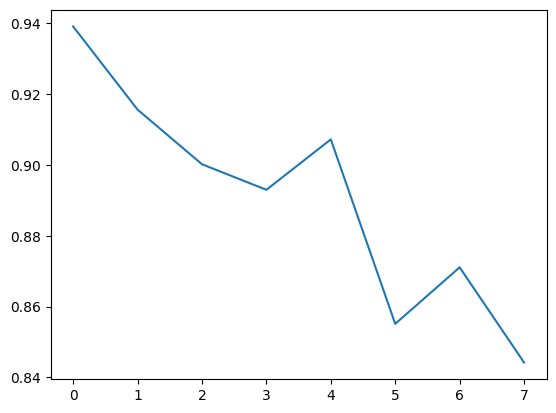

In [ ]:
plt.plot(visibilities[2:])
print(visibilities)
print(t_eval.graph)

np.save("visibilities.npy", visibilities)

/tmp/ipykernel_4068623/4031899224.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  read_visibilities = np.load("visibilities.npy").astype(np.float64)


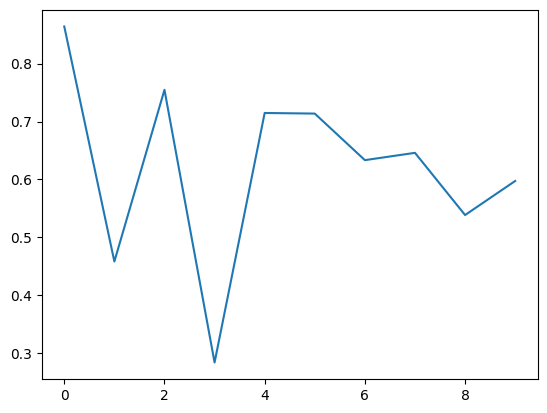

In [ ]:
read_visibilities = np.load("visibilities.npy").astype(np.float64)
plt.plot(read_visibilities)

/tmp/ipykernel_1445615/3706051534.py:16: DeprecationWarning: Call to deprecated function "bpointer"; use "node.predecessor" instead.
  G.add_edge(node.bpointer, node.identifier)
/tmp/ipykernel_1445615/3706051534.py:16: DeprecationWarning: Call to deprecated function "bpointer"; use "node.predecessor" instead.
  G.add_edge(node.bpointer, node.identifier)
/tmp/ipykernel_1445615/3706051534.py:16: DeprecationWarning: Call to deprecated function "bpointer"; use "node.predecessor" instead.
  G.add_edge(node.bpointer, node.identifier)
/tmp/ipykernel_1445615/3706051534.py:16: DeprecationWarning: Call to deprecated function "bpointer"; use "node.predecessor" instead.
  G.add_edge(node.bpointer, node.identifier)
/tmp/ipykernel_1445615/3706051534.py:16: DeprecationWarning: Call to deprecated function "bpointer"; use "node.predecessor" instead.
  G.add_edge(node.bpointer, node.identifier)
/tmp/ipykernel_1445615/3706051534.py:16: DeprecationWarning: Call to deprecated function "bpointer"; use "node

Graphviz not found. Using a default, potentially non-hierarchical layout.


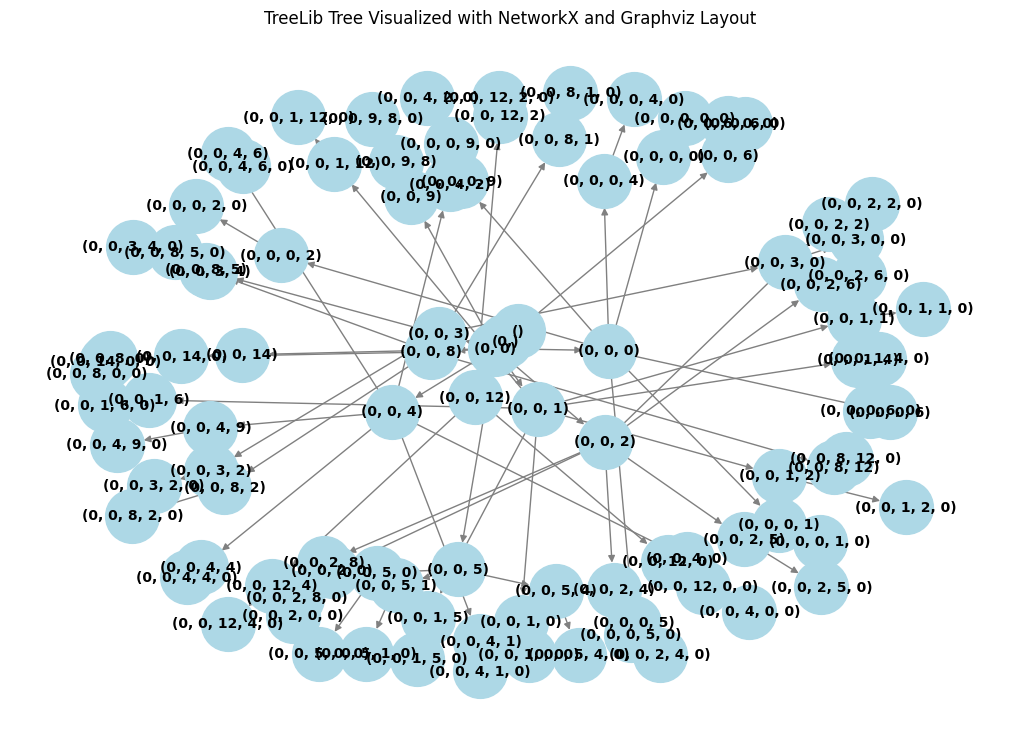

In [ ]:
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
def display_treelib_with_networkx(tree):
    """
    Converts a treelib Tree object to a networkx DiGraph and displays it.
    """
    # Create an empty directed graph in networkx
    G = nx.DiGraph()

    # Iterate through the treelib tree to add nodes and edges
    # We use tree.all_nodes() to get every node
    for node in tree.all_nodes():
        G.add_node(node.identifier, label=node.tag) # Add node with its tag as a label attribute
        if node.identifier != tree.root:
            # Add an edge from the parent to the current node
            G.add_edge(node.bpointer, node.identifier)

    # Use graphviz_layout for a proper hierarchical tree layout
    # The 'prog="dot"' option ensures a top-down hierarchical flow
    try:
        pos = graphviz_layout(G, prog="dot")
    except ImportError:
        # Fallback if pydot or graphviz is not correctly installed/configured
        print("Graphviz not found. Using a default, potentially non-hierarchical layout.")
        pos = nx.spring_layout(G)

    # Draw the graph
    plt.figure(figsize=(10, 7))
    # 'labels' uses the 'label' attribute we added to the nodes
    nx.draw(G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'),
            node_color='lightblue', node_size=1500, edge_color='gray', arrows=True,
            font_size=10, font_weight='bold')
    plt.title("TreeLib Tree Visualized with NetworkX and Graphviz Layout")
    plt.axis('off') # Hide the axis
    plt.show()

display_treelib_with_networkx(t_eval.graph)

In [ ]:
for i in [1e-3]: # np.linspace(0.1, 0.5, 5):
    params["alpha_list"] = np.array([3*np.pi/2])

    fidelities, probabilities, t_eval = perform_swapping_simulation(N, num_modes, num_simulations, params = params, error_tolerance = error_tolerance)
    print("probabilities:", probabilities)
    print("fidelities:", fidelities)
    prob_diff_phase += np.mean(probabilities)

    visibilities.append((prob_same_phase - prob_diff_phase) / (prob_same_phase + prob_diff_phase))
# params["BSM_meas"] = {1:(2,3), 0:(6,7)}

# fidelities, probabilities, t_eval = perform_swapping_simulation(N, num_modes, num_simulations, params = params, error_tolerance = error_tolerance)
# prob_diff_phase += np.mean(probabilities)

# params["alpha_list"] = np.array([np.pi/2])

# fidelities, probabilities, t_eval = perform_swapping_simulation(N, num_modes, num_simulations, params = params, error_tolerance = error_tolerance)
# prob_same_phase += np.mean(probabilities)

operation: fiber_attenuation formalism: kraus traversed nodes: ()
next operation:
operation: fiber_attenuation formalism: kraus traversed nodes: (0,)
next operation:
operation: beam splitter formalism: closed traversed nodes: (0, 0)
next operation:
operation: beam splitter formalism: closed traversed nodes: (0, 0)
next operation:
operation: detector inefficiency formalism: kraus traversed nodes: (0, 0)


SystemError: CPUDispatcher(<function svd_truncated_numba at 0x729044daf880>) returned a result with an exception set

In [ ]:
from trajectree.fock_optics.utils import create_bimode_bell_state, outer_product_mps
from trajectree.fock_optics.outputs import read_quantum_state
read_quantum_state(create_bimode_bell_state("psi_minus", N, error_tolerance = 1e-12), N)



Corresponding Basis terms:
0H0V_D 0H0V_C 1H0V_B 0H1V_A - 12 - [0.70710678+0.j]
0H0V_D 0H0V_C 0H1V_B 1H0V_A - 28 - [-0.70710678+0.j]


In [ ]:
(prob_same_phase - prob_diff_phase) / (prob_same_phase + prob_diff_phase)

np.float64(0.9940825533144946)